# Практическая работа №2: Моделирование и анализ линейных комбинаций дискретных сигналов

Выполнили студентки гр. 0382 Михайлова Оксана и Охотникова Галина. Вариант №12.

## Цель работы

Изучить математическое описание линейных комбинаций дискретных гармонических сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

__Дискретный сигнал__ — это сигнал, дискретный по времени и непрерывный по состоянию.

__Дискретный единичный скачок__: 

$\sigma_d (k) = \begin{cases}
   1, k \geq 0\\
   0, k < 0
 \end{cases}, \enspace k = ..., -2, -1, 0, 1, 2, ...$

__Прямоугольный импульс__:

$s_1(k) =  \begin{cases}
  U, n_0 \le k \le n_0 + n_{imp} -1 \\
  0, иначе
\end{cases} $

__Дискретный гармонический сигнал__: $ s(k) = C\cos(\hat{\omega}_0k) $

__Линейная комбинация дискретных гармонических сигналов__ :

$ s_2(k) = a_1x_1(k) + a_2x_2(k) + a_3x_3(k), $

где $ x_i(k) = B_i\sin(\hat\omega_ik) $ - дискретные гармонические сигналы, $ a_i $ - коэффициенты, $ i = 1, 2, 3. $

__Среднее значение последовательности__ - отношение суммы значений последовательности к ее длине.

__Энергия последовательности__ - сумма квадратов значений последовательности.

__Средняя мощность последовательности__ - отношение энергии последовательности к ее длине.

__Огибающая сигнала__ - функцию, которая описывает изменение амплитуды сигнала во времени.

## Постановка задачи

С помощью программных средств провести моделирование и анализ линейных комбинаций дискретных гармонических последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы

__Начальные данные__

Номер бригады: $ N_{бр} = 12 $

Длина последовательности: $ N = 30 + N_{бр}\bmod 5 = 32 $

Основание экспоненты: $ a = (-1)^{N_{бр}}(0.8 + 0.005(N_{бр} \bmod 20)) = 0.86$

Амплитуда гармонического сигнала: $ C = 1 + N_{бр} \bmod 5 = 3$

Частота гармонического сигнала: $ \hat{\omega}_0 = \pi/(6 + N_{бр} \bmod 5) = \pi/8$ 

Амплитуда импульса: $ U = N_{бр} = 12 $

Начальный момент импульса: $ n_0 = 3 + N_{бр} \bmod 5 = 5$

Длина импульса: $ n_{imp} = 5 + N_{бр} \bmod 5 = 7$

Амплитуда гармонических сигналов:

$ B_1 = 1.5 + N_{бр} \bmod 5 = 3.5$

$ B_2 = 5.7 - N_{бр} \bmod 5 = 3.7$

$ B_3 = 2.2 + N_{бр} \bmod 5 = 4.2$ 

Частоты гармонических сигналов:

$ \hat{\omega}_1 = \pi/(4 + N_{бр} \bmod 5) = \pi/6$

$ \hat{\omega}_2 = \pi/(8 + N_{бр} \bmod 5) = \pi/10$

$ \hat{\omega}_3 = \pi/(16 + N_{бр} \bmod 5) = \pi/18$

Коэффициенты линейной комбинации гармонических сигналов:

$ a_1 = 1.5 - N_{бр} \bmod 5 = -0.5$

$ a_2 = 0.7 + N_{бр} \bmod 5 = 2.7$

$ a_3 = 1.4 + N_{бр} \bmod 5 = 3.4$

In [102]:
import numpy as np
import matplotlib.pyplot as plt

Nb = 12
N = 30 + Nb % 5
a = (-1)**Nb * (0.8 + 0.005 * (Nb % 20))
C = 1 + Nb % 5
w0 = np.pi/(6 + Nb % 5)
U = Nb
n0 = 3 + Nb % 5
n_imp = 5 + Nb % 5

B1 = 1.5 + Nb % 5
B2 = 5.7 - Nb % 5
B3 = 2.2 + Nb % 5

w1 = np.pi/(4 + Nb % 5)
w2 = np.pi/(8 + Nb % 5)
w3 = np.pi/(16 + Nb % 5)

a1 = 1.5 - Nb % 5
a2 = 0.7 + Nb % 5
a3 = 1.4 + Nb % 5

### Пункт 1.

Был смоделирован дискретный прямоугольный импульс $ s_1(k) $ на основе дискретного единичного скачка $ \sigma_d(k) $ из п/р №1. На основе полученных значений был построен график на интервале времени $ n \in [0, N - 1] $. 

Моделирование импульса было выполнено следующим образом:

$ s_1(k) = U(\sigma_d(k-n_0) - \sigma_d(k-(n_0+n_{imp}-1)) $ - линейная комбинация двух задержанных дискрестных единичных скачков с равной по модулю амплитудой.

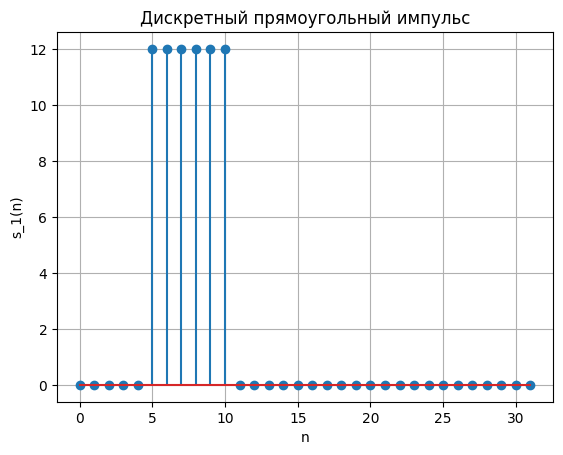

In [103]:
# дискретный единичный скачок
def sigma_d(k):
    arr = np.array([1 if i >= 0 else 0 for i in k])
    return arr

# дискретный прямоугольный импульс
def s_1(k):
    arr =  U*(sigma_d(k-n0) - sigma_d(k-n0-n_imp+1))
    return arr
    
# задание интервала
n = np.arange(N)

# построение графика
plt.stem(n, s_1(n))
plt.title('Дискретный прямоугольный импульс')
plt.xlabel('n')
plt.ylabel('s_1(n)')
plt.grid()
plt.show()


### Пункт 2.

Была смоделирована линейная комбинация дискретных гармонических сигналов $ s_2(k) $. На основе полученных значений был построен график на интервале времени $ n \in [0, 5N - 1] $. 

Операции при моделировании линейной комбинации сигналов $ s_2(k) $:

Был задан интервал $ n \in [0, 5N - 1] $. Затем для моделирования линейной комбинации $ s_2(k) $ в момент времени $ k $ были вычислены значения дискретных гармонических сигналов $ x_1(k), x_2(k), x_3(k), $ результаты были домножены на соответвующие коэффициенты $ a1, a2, a3, $ после чего полученные произведения были просуммированы.

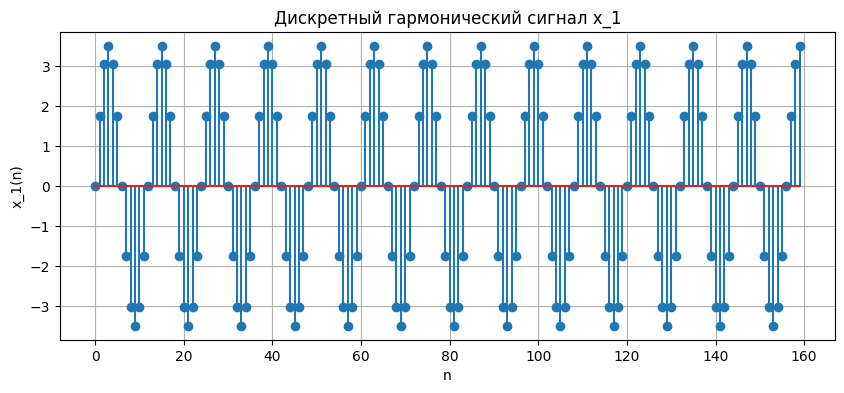

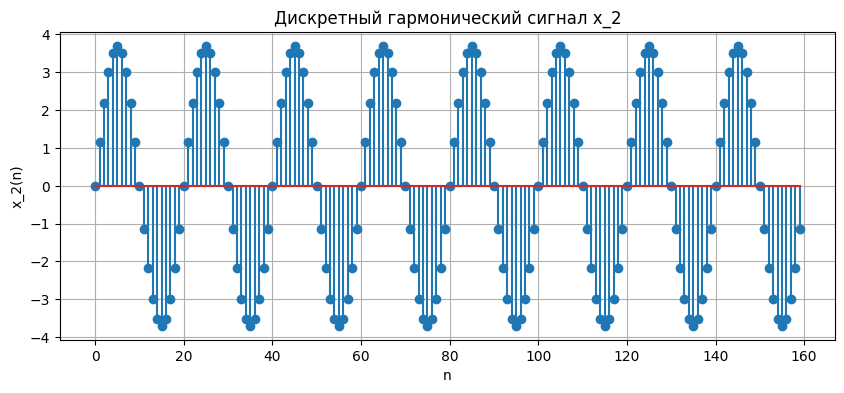

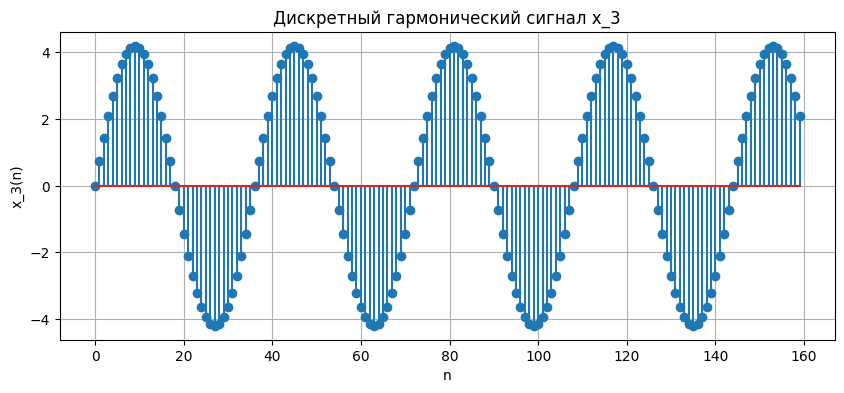

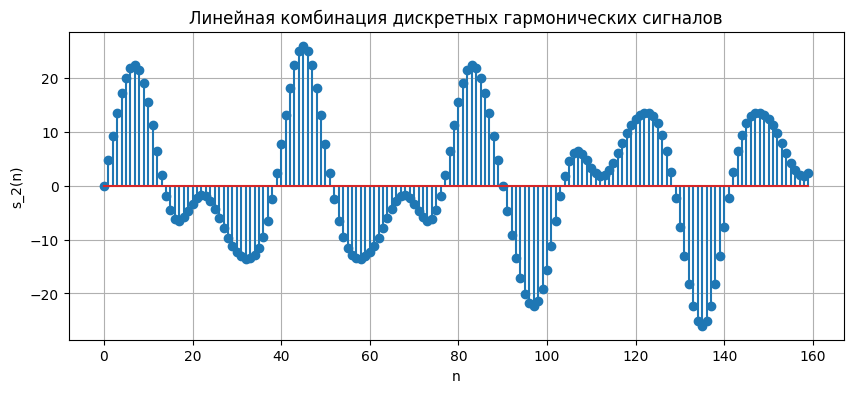

In [104]:
B = [B1, B2, B3]
W = [w1, w2, w3]

# дискретный гармонический сигнал x_i
def x_i(i, k):
    arr = np.array([B[i]*np.sin(W[i]*j) for j in k])
    return arr

# линейная комбинация дискретных гармонических сигналов
def s_2(k):
    arr = np.array(a1*x_i(0, k) + a2*x_i(1, k) + a3*x_i(2, k))
    return arr

# задание интервала
n = np.arange(5*N)

# построение графиков
plt.figure(figsize=(10,4))
plt.stem(n, x_i(0, n))
plt.title('Дискретный гармонический сигнал x_1')
plt.xlabel('n')
plt.ylabel('x_1(n)')
plt.grid()
plt.show()

plt.figure(figsize=(10,4))
plt.stem(n, x_i(1, n))
plt.title('Дискретный гармонический сигнал x_2')
plt.xlabel('n')
plt.ylabel('x_2(n)')
plt.grid()
plt.show()

plt.figure(figsize=(10,4))
plt.stem(n, x_i(2, n))
plt.title('Дискретный гармонический сигнал x_3')
plt.xlabel('n')
plt.ylabel('x_3(n)')
plt.grid()
plt.show()

plt.figure(figsize=(10,4))
plt.stem(n, s_2(n))
plt.title('Линейная комбинация дискретных гармонических сигналов')
plt.xlabel('n')
plt.ylabel('s_2(n)')
plt.grid()
plt.show()


Были вычислены среднее значение mean_s2, энергия E и средняя мощность P последовательности $ s_2(k) $. Указанные характеристики были определены следующим образом:

$ mean\_s2 = \frac {1} {5N} \sum_{k=0}^{5N-1} s_2(k)$

$ E = \sum_{k=0}^{5N-1} s_2^2(k) $

$ P = \frac {E} {5N} $

In [105]:
mean_s2 = np.mean(s_2(n))
E = np.sum(s_2(n)**2)
P = E/len(s_2(n))

print("mean_s2 =", mean_s2)
print("E =", E)
print("P =", P)

mean_s2 = 0.9482303675189678
E = 24233.794012941784
P = 151.46121258088615


### Пункт 3.

Был построен график дискретного сигнала $ s_3(k) $ представляющего собой дискретный гармонический сигнал $ s(k) $ с экспоненциальной огибающей $ |a|^k $, на интервале времени $ n \in [0, N-1] $.

Аналитическая формула дискретного сигнала $ s_3(k) $:

$ s_3(k) = |a|^k C \cos(\hat\omega_0 k) $

Операции при его моделировании:

Был задан интервал времени $ n \in [0, N-1] $. Затем для получения дискретного сигнала $ s_3(k) $ было выполнено умножение дискретного гармонического сигнала $ s(k) = C\cos(\hat{\omega}_0k) $ на экспоненциальную огибающую $ |a|^k $.

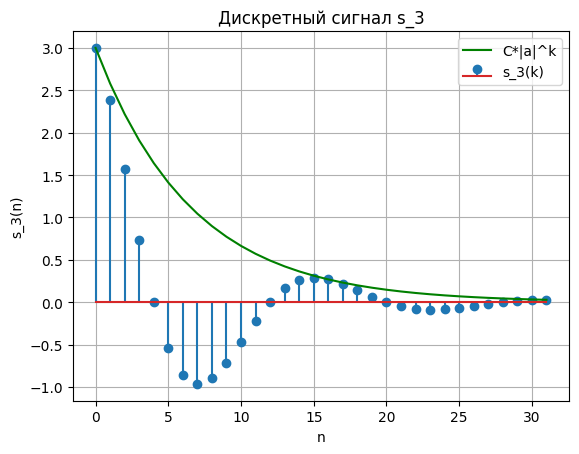

In [108]:
def s_3(k):
    arr = [C * np.cos(w0 * i) * (np.abs(a)**i) for i in k]
    return arr

# задание интервала
n = np.arange(N)

# построение графиков
plt.stem(n, s_3(n), label='s_3(k)')
plt.plot(n, C*np.abs(a)**n, color='g', label='C*|a|^k')
plt.title('Дискретный сигнал s_3')
plt.xlabel('n')
plt.ylabel('s_3(n)')
plt.legend()
plt.grid()
plt.show()

### Пункт 4.

Был построен график пяти периодов периодической последовательности $ s_4(k) $ дискретных прямоугольных импульсов амплитуды $ U $ и длительности $ n_{imp} $ с периодом $ T $, вдвое большим длительности импульса. 

Операции при моделировании периодической последовательности:

Был задан интервал $ n \in [0, 5T-1], $ где $ T = 2n_{imp} $. Затем для моделирования последовательности $ s_4(k) $ были вычислены и просуммированы прямоугольные импульсы $ s_1(k) $ с задержкой $ T*i, $ где $ i $ - порядковый номер импульса $ s_1(k) $.

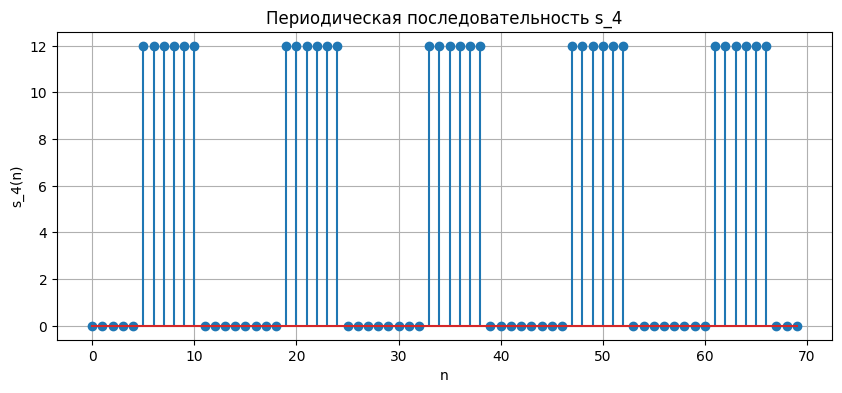

In [107]:
# периодическая последовательность
def s_4(k):
    arr = sum([s_1(k-i*T) for i in range(5)])
    return arr
    
# задание интервала
T = 2*n_imp
n = np.arange(5*T)

# построение графиков
plt.figure(figsize=(10,4))
plt.stem(n, s_4(n))
plt.title('Периодическая последовательность s_4')
plt.xlabel('n')
plt.ylabel('s_4(n)')
plt.grid()
plt.show()

## Выводы

В результате выполнения данной практической работы было изучено математическое описание линейных комбинаций дискретных гармонических сигналов и получены навыки их моделирования программными средствами. В ходе выполнения работы были исследованы дискретный прямоугольный импульс на основе цифрового единичного скачка и линейная комбинация дискретных гармонических сигналов. Для линейной комбинации были вычислены ее среднее значение, энергия и средняя мощность. Был изучен дискретный гармонический сигнал с экспоненциальной огибающей, для которого была приведена аналитическая формула. Также была выведена формула для моделирования периодической последовательности дискретных прямоугольных импульсов. Для всех рассмотренных сигналов были построены графики на интервалах дискретного времени. Также при исследовании было замечено, что коэффициенты и сигналы, входящие в линейную комбинацию влиют на амплитуду и форму результирующего сигнала.